<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_probability_distribution_gaussian_conditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#**Continous Probability Distribution**
> The probability is now expressed in terms of probability density function (pdf)


#**2D Gaussian distribution: with two continuous random variables**
> Let’s assume $x$ is random variable which can take continuous values.
> It is represented by a probability density function (pdf). For example, $x$ is a random variable which is generated from a **Gaussian distribution** (also known as normal distribution) with mean $\mu=0.1$ and standard deviation $\sigma=1$ is represented with the following probabilty density function (pdf):

> $P(\bf{z}) = \frac{1}{2\pi\sqrt(|\Sigma|)}exp^{\frac{-(z-\mu)^T\Sigma^{-1}(z-\mu)}{2}}$

Let's calculate the 2D Gaussian distribution for two random variables $(x, y)$.
> These two variables can be put into a column vector: $\bf{z} =
\begin{bmatrix}
x \\
y
\end{bmatrix}$
> The two parameters of the 2D Gaussian distributions are it's mean vector and covariance matrix. These are defined as follows:
> mean vector: $\mu =
\begin{bmatrix}
\mu_1 \\
\mu_1
\end{bmatrix}$

> And the covariance matrix:
$\Sigma = \begin{bmatrix}
\sigma_{11}^2 & \sigma_{12}^2\\
\sigma_{21}^2 & \sigma_{22}^2\\
\end{bmatrix}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

def generate_2d_gaussian_distribution(mean, covariance_matrix):
  plt.figure(figsize=(6,4))
  plt.grid(True)

  # a grid of (x, y) coordinates
  x = np.linspace(-5, 5, 50)
  y = np.linspace(-5, 5, 50)
  X, Y = np.meshgrid(x, y)

  # assign index to each slice along Y direction


  # create a 2D Gaussian distribution using the grid
  pos = np.dstack((X, Y))
  rv = multivariate_normal(mean, covariance_matrix)
  Z = rv.pdf(pos)
  Z = Z/sum(sum(Z)) # normalize so that probability sums up to 1.0

  # plot
  #plt.contourf(X, Y, Z, cmap='viridis', levels=50)
  #plt.contourf(X, Y, Z, cmap='RdBu', levels=50)
  plt.contourf(X, Y, Z, cmap='jet', levels=50)
  plt.colorbar(label='Probability density')
  plt.title('2D Gaussian distribution')
  plt.xlabel('continous random variable: x')
  plt.ylabel('continous random variable: y')

  # draw two horizontal lines to denote the conditional probability slices p(x|y) at y=-1.73469388 and y=1.73469388
  x = np.linspace(-5, 5, 100)
  y = -1.73469388 * np.ones_like(x)
  plt.plot(x, y, label='y = -1.73469388', color='cyan')
  y = 0.10 * np.ones_like(x)
  plt.plot(x, y, label='y = 0.10', color='red')
  y = 1.73469388 * np.ones_like(x)
  plt.plot(x, y, label='y = 1.73469388', color='yellow')
  plt.show()

  return Z



In [ ]:
# find the indices of the slices where we need to compute the conditional probability of the form P(x|y=y*)
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
y_list = y.tolist()
truncated_values = [round(value, 2) for value in y_list]
print(f'range of y-values in the 2D grid space \n ={truncated_values}\n\n')
index_y1= truncated_values.index(-1.73)
print(f'index of value -1.73 ={index_y1}')
index_y2= truncated_values.index(0.10)
print(f'index of value 0.10 ={index_y2}')
index_y3 = truncated_values.index(1.73)
print(f'index of value 1.73 ={index_y3}')

range of y-values in the 2D grid space 
 =[-5.0, -4.8, -4.59, -4.39, -4.18, -3.98, -3.78, -3.57, -3.37, -3.16, -2.96, -2.76, -2.55, -2.35, -2.14, -1.94, -1.73, -1.53, -1.33, -1.12, -0.92, -0.71, -0.51, -0.31, -0.1, 0.1, 0.31, 0.51, 0.71, 0.92, 1.12, 1.33, 1.53, 1.73, 1.94, 2.14, 2.35, 2.55, 2.76, 2.96, 3.16, 3.37, 3.57, 3.78, 3.98, 4.18, 4.39, 4.59, 4.8, 5.0]


index of value -1.73 =16
index of value 0.10 =25
index of value 1.73 =33


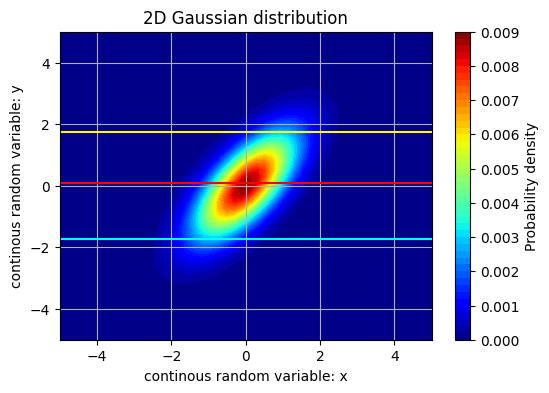

In [ ]:
# Let's generate a full covariance matrix
# 2D Gaussian is centered at (0, 0) coordinate
mean              =  [0.0, \
                      0.0]

# covariance matrix spreads the probability density in all directions.
covariance_matrix = [[0.8, 0.7], \
                     [0.7, 1.3]]
Z = generate_2d_gaussian_distribution(mean, covariance_matrix)

In [ ]:
print(f'The area under the curve should be 1.0 for it to conform to a probability distribution. \n area ={sum(sum(Z))}')

The area under the curve should be 1.0 for it to conform to a probability distribution. 
 area =0.9999999999999994


#**Conditional Distribution of a 2D Gaussian**
> The conditional probability distribution of any single random variable (eg, x) conditioned on other variable’s (eg, y) value fixed to a particular value.

> For example, consider the 2D normal distribution $P(x,y)$ shown in the figure above. This represents the joint probabilty distribution for this Gaussian.

> If we consider the conditional distribution $P(x∣y=−1.73)$, it represents a slice of the 2D distribution with the $y$ value fixed at $-1.73$. It represents the cyan horizontal line in the figure above.

> It will resemble a 1D normal distribution.

In [ ]:
Z[index_y1,:]

array([9.19467036e-12, 6.22218419e-11, 3.81589091e-10, 2.12077905e-09,
       1.06817224e-08, 4.87566141e-08, 2.01684339e-07, 7.56061637e-07,
       2.56855350e-06, 7.90799557e-06, 2.20643230e-05, 5.57906194e-05,
       1.27843352e-04, 2.65485924e-04, 4.99633144e-04, 8.52132969e-04,
       1.31707311e-03, 1.84484034e-03, 2.34182306e-03, 2.69398863e-03,
       2.80856076e-03, 2.65349503e-03, 2.27195184e-03, 1.76289461e-03,
       1.23965252e-03, 7.89987054e-04, 4.56232656e-04, 2.38780660e-04,
       1.13255243e-04, 4.86814913e-05, 1.89633831e-05, 6.69443841e-06,
       2.14170115e-06, 6.20940487e-07, 1.63150148e-07, 3.88482407e-08,
       8.38304171e-09, 1.63937492e-09, 2.90536922e-10, 4.66627969e-11,
       6.79182657e-12, 8.95877846e-13, 1.07092090e-13, 1.16014529e-14,
       1.13897385e-15, 1.01335476e-16, 8.17063221e-18, 5.97030060e-19,
       3.95351255e-20, 2.37255579e-21])

In [ ]:
# computing the conditional probablity distributions p(x|y=y*)
sample_size      = len(Z[index_y1,:])
conditional_dist_index1 = Z[index_y1,:] # yellow line: conditional probability P(x|y=1.73)
conditional_dist_index2 = Z[index_y2,:] # red line: conditional probability P(x|y=0.10)
conditional_dist_index3 = Z[index_y3,:] # cyan line: conditional probability P(x|y=-1.73)
x = [tmp for tmp in range(sample_size)]



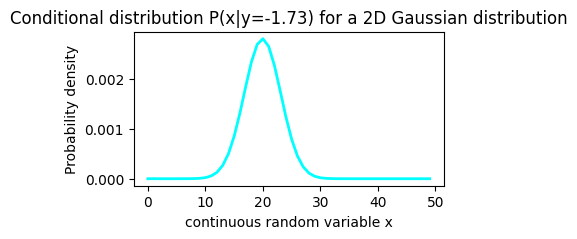

In [ ]:
# plotting the p(x|y=-1.73)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index1, 'cyan', linewidth=2)
plt.title('Conditional distribution P(x|y=-1.73) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()

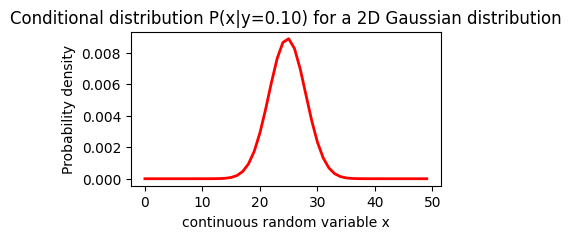

In [ ]:
# plotting the p(x|y=0.10)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index2, 'red', linewidth=2)
plt.title('Conditional distribution P(x|y=0.10) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()

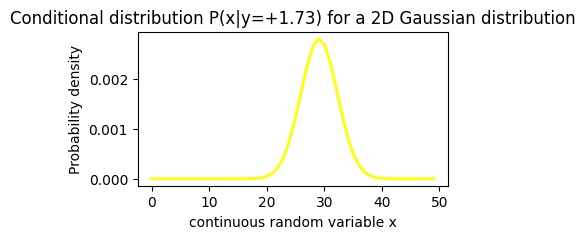

In [ ]:
# plotting the p(x|y=+1.73)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index3, 'yellow', linewidth=2)
plt.title('Conditional distribution P(x|y=+1.73) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()

#**Group exercise #4: 2D Gaussian distribution**
> Change the mean vector and covariance matrix to generate a 2D Gaussian distribution of different shapes and recompute two conditional distributions $P(x|y=-1.73)$ and $P(x|y=1.73)$.

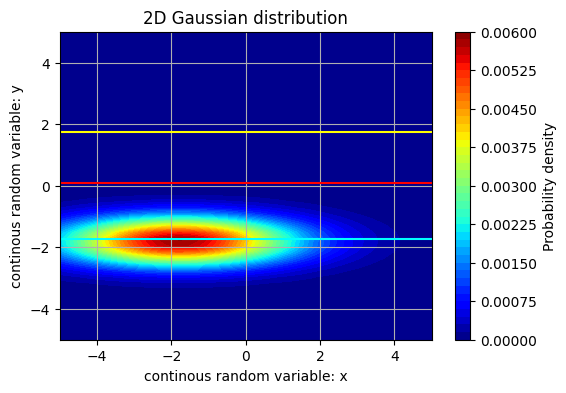

In [ ]:
# Let's generate a full covariance matrix
# 2D Gaussian is centered at (0, 0) coordinate
mean              =  [-1.8, \
                      -1.8]

# covariance matrix spreads the probability density in all directions.
covariance_matrix = [[4.8, 0.0], \
                     [0.0, 0.3]]
Z = generate_2d_gaussian_distribution(mean, covariance_matrix)

In [ ]:
# computing the conditional probablity distributions p(x|y=y*)
# your code here
# ...
# ...

sample_size      = len(Z[index_y1,:])
conditional_dist_index1 = Z[index_y1,:] # yellow line: conditional probability P(x|y=1.73)
conditional_dist_index2 = Z[index_y2,:] # red line: conditional probability P(x|y=0.10)
conditional_dist_index3 = Z[index_y3,:] # cyan line: conditional probability P(x|y=-1.73)
x = [tmp for tmp in range(sample_size)]

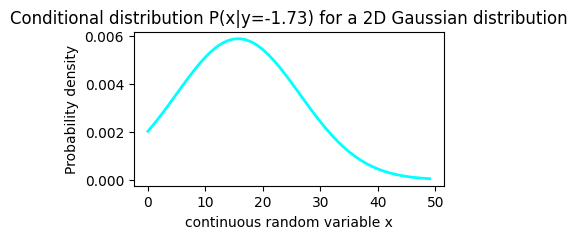

In [ ]:
# plotting the p(x|y=-1.73)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index1, 'cyan', linewidth=2)
plt.title('Conditional distribution P(x|y=-1.73) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()

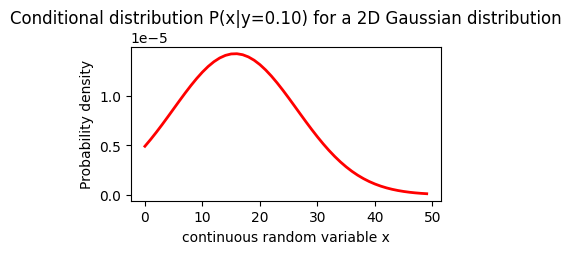

In [ ]:
# plotting the p(x|y=0.10)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index2, 'red', linewidth=2)
plt.title('Conditional distribution P(x|y=0.10) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()

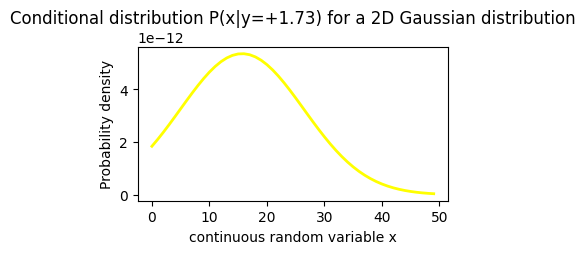

In [ ]:
# plotting the p(x|y=+1.73)
plt.figure(figsize=(4,2))
plt.plot(x, conditional_dist_index3, 'yellow', linewidth=2)
plt.title('Conditional distribution P(x|y=+1.73) for a 2D Gaussian distribution')
plt.xlabel('continuous random variable x' )
plt.ylabel('Probability density')
plt.show()